In [1]:
import numpy as np
import matplotlib.pyplot as plt
import np_info_analysis as na

In [2]:
'''
matlab colors
#DD6734
#0284C0
'''
yellow='#ffb200'
blue='#0284C0'
red='#DD5544'

name='L3'

In [3]:
print('x\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
print('\t'.join([str(i) for i in range(9)]))

x	y	cx	cy	C	std	int	maxint	relBg
0	1	2	3	4	5	6	7	8


In [18]:
# main_folder='C:/Users/jabuk/Documents/jaderka/ufe/results/'
# folder=main_folder+'L3/'

main_folder='C:/SPRUP_data_Jenda/2019_03_13_Jenda_microscopy/'
# folder=main_folder+'19_08_29_L3/export_np/'
folder=main_folder+'19_09_02_L3/export_np/'



In [26]:
#19_08_29_L3
# np=100
# nm=[2, 1, 3, 4, 5]
# np=80
# nm=[10, 9, 8, 7, 6]
# np=60
# nm=[11, 12, 13, 14, 15]
# np=40
# nm=[26, 25, 22, 23, 24]

# 19_09_02_L3
# np=100
# nm=[13, 14, 15, 16, 17]
# nm+=[6, 8, 7]
# np=80
# nm=[22, 21, 20, 19, 18]
np=60
nm=[23, 24, 25, 26, 27]
# nm+=[28, 29, 30]


files=[folder+'raw_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('position in dip')
data=[]
data_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

position in dip
no	x	y	cx	cy	C	std	int	maxint	relBg
23	38.1	10.0	2.80	3.56	2.07	0.00055	0.03050	0.00324	0.00044
n= 10	5.6	3.0	0.57	1.27	0.35	0.00004	0.01136	0.00065	0.00003
--------------------------------------------------------------------------------
24	46.6	10.0	2.92	4.19	2.20	0.00046	0.03192	0.00298	0.00037
n= 10	4.4	3.5	0.54	1.39	0.46	0.00005	0.01053	0.00068	0.00004
--------------------------------------------------------------------------------
25	38.4	10.5	3.87	5.26	2.79	0.00031	0.02802	0.00244	0.00024
n= 10	8.8	3.0	1.05	1.03	0.56	0.00003	0.01339	0.00088	0.00002
--------------------------------------------------------------------------------
26	51.0	12.0	3.44	4.11	2.38	0.00045	0.04953	0.00305	0.00035
n= 10	6.2	3.1	0.47	0.72	0.28	0.00007	0.01126	0.00045	0.00003
--------------------------------------------------------------------------------
27	42.2	12.6	4.38	4.96	2.94	0.00053	0.06710	0.00466	0.00042
n= 10	6.0	2.6	1.03	1.29	0.75	0.00002	0.01952	0.00081	0.00001
-------------------

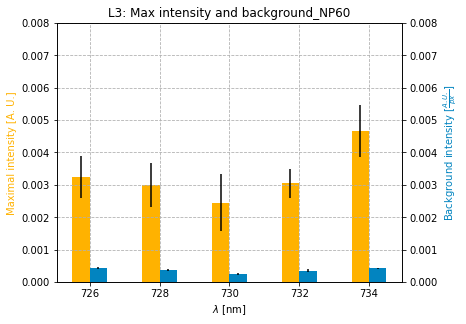

In [27]:
wls=[726, 728, 730, 732, 734]
data1=[d[7] for d in data]
data1_std=[d[7] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]



w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Max intensity and background_NP'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Maximal intensity [A. U.]', color=yellow)
axes.set_ylim([0, 0.008])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.008])

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

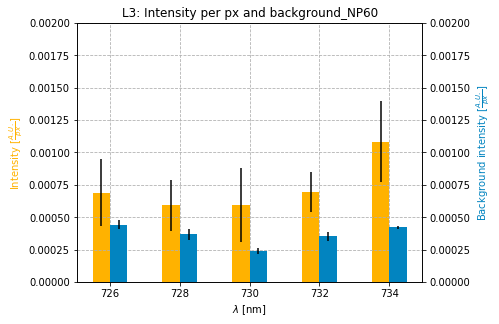

In [28]:
wls=[726, 728, 730, 732, 734]
# wls+=[736, 738, 740]
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]

w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity per px and background_NP'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Intensity [$\\frac{A. U.}{px}$]', color=yellow)
axes.set_ylim([0, 0.002])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.002])

axes.bar([s-w/2 for s in wls], data3, w, yerr=data3_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

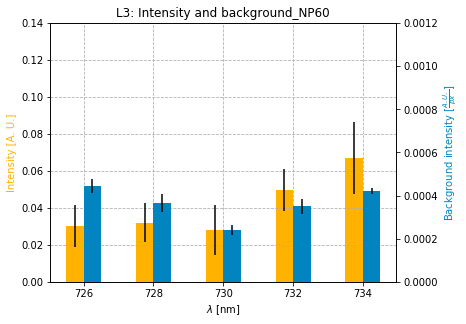

In [29]:
wls=[726, 728, 730, 732, 734]
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity and background_NP'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Intensity [A. U.]', color=yellow)
axes.set_ylim([0, 0.14])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.0012])

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

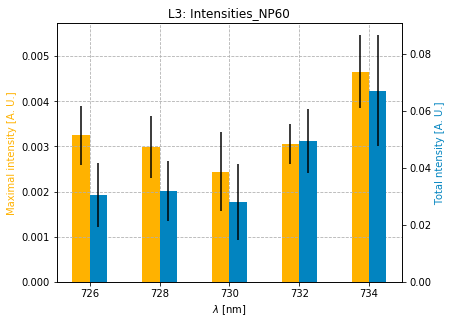

In [30]:
wls=[726, 728, 730, 732, 734]
data1=[d[7] for d in data]
data1_std=[d[7] for d in data_std]
data2=[d[6] for d in data]
data2_std=[d[6] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensities_NP'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Maximal intensity [A. U.]', color=yellow)

axesI = axes.twinx()
axesI.set_ylabel('Total ntensity [A. U.]', color=blue)

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

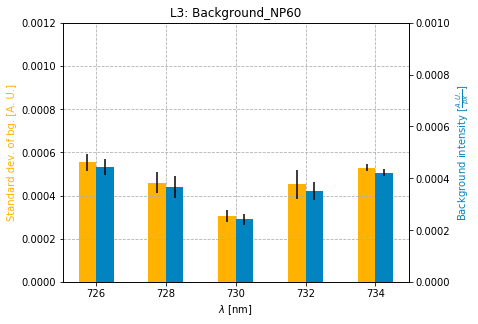

In [31]:
wls=[726, 728, 730, 732, 734]
data1=[d[5] for d in data]
data1_std=[d[5] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Background_NP'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Standard dev. of bg. [A. U.]', color=yellow)
axes.set_ylim([0, 0.0012])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.001])

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

## Noise reduction with time

In [16]:
np=734
nm=[5, 6, 15, 15] #jeste 30
# np=730
# nm=[3, 8, 13, 21] #jeste 29



files=[folder+'norm_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]

data=[]
data_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

#     print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
#     print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
#     print(80*'-')

no	x	y	cx	cy	C	std	int	maxint	relBg


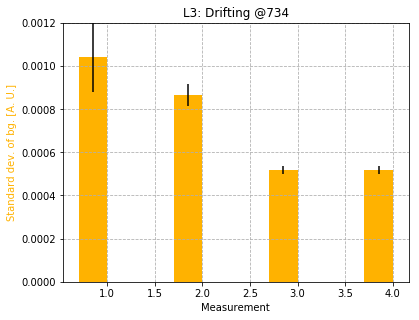

In [17]:
ts=[1, 2, 3, 4]
data1=[d[5] for d in data]
data1_std=[d[5] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.3

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Drifting @'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('Measurement')
axes.set_ylabel('Standard dev. of bg. [A. U.]', color=yellow)
axes.set_ylim([0, 0.0012])
# axesI = axes.twinx()
# axesI.set_ylabel('Intensity per one px [A. U.]', color=blue)

axes.bar([s-w/2 for s in ts], data1, w, yerr=data1_std, color=yellow, label='x')

# axesI.bar([s+w/2 for s in ts], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

# Different NP sizes

In [34]:
# wl=734
# nm=[5, 6, 15, 24]  
# wl=732
# nm=[4, 7, 14, 23]
# wl=730
# nm=[3, 8, 13, 22]
# wl=728
# nm=[1, 9, 12, 25]
# wl=726
# nm=[2, 10, 11, 26]

wl=734
nm=[17, 18, 27]  
# wl=732
# nm=[16, 19, 26]
# wl=730
# nm=[15, 20, 25]
# wl=728
# nm=[14, 21 ,24]
# wl=726
# nm=[13, 22, 23]

files=[folder+'raw_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('position in dip')
data=[]
data_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

position in dip
no	x	y	cx	cy	C	std	int	maxint	relBg
17	53.0	16.0	4.26	4.80	2.68	0.00056	0.09637	0.00524	0.00044
n= 20	6.8	4.7	0.67	1.88	0.59	0.00005	0.02335	0.00101	0.00003
--------------------------------------------------------------------------------
18	40.4	12.9	4.53	4.85	2.84	0.00062	0.07599	0.00531	0.00050
n= 10	5.0	1.4	0.70	1.11	0.44	0.00004	0.01447	0.00116	0.00003
--------------------------------------------------------------------------------
27	42.2	12.6	4.38	4.96	2.94	0.00053	0.06710	0.00466	0.00042
n= 10	6.0	2.6	1.03	1.29	0.75	0.00002	0.01952	0.00081	0.00001
--------------------------------------------------------------------------------


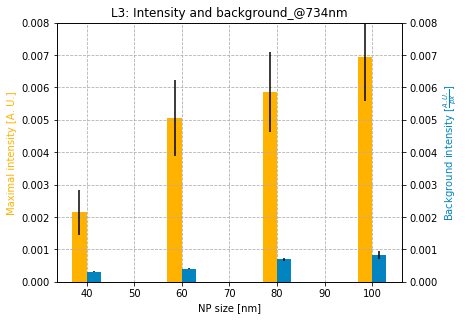

In [56]:
nps=[100, 80, 60, 40]
data1=[d[7] for d in data]
data1_std=[d[7] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=3

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity and background_@'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Maximal intensity [A. U.]', color=yellow)
axes.set_ylim([0, 0.008])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.008])


axes.bar([s-w/2 for s in nps], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in nps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

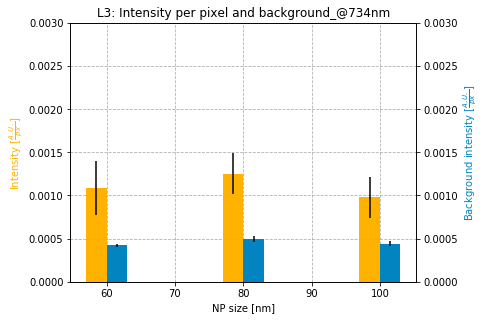

In [63]:
nps=[100, 80, 60]
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

w=3

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity per pixel and background_@'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Intensity [$\\frac{A. U.}{px}$]', color=yellow)
axes.set_ylim([0, 0.003])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.003])


axes.bar([s-w/2 for s in nps], data3, w, yerr=data3_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in nps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

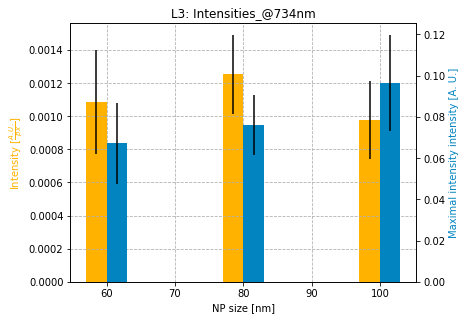

In [74]:
nps=[100, 80, 60]
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[6] for d in data]
data2_std=[d[6] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

w=3

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensities_@'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Intensity [$\\frac{A. U.}{px}$]', color=yellow)
# axes.set_ylim([0, 0.12])

axesI = axes.twinx()
axesI.set_ylabel('Maximal intensity intensity [A. U.]', color=blue)
# axesI.set_ylim([0, 0.12])


axes.bar([s-w/2 for s in nps], data3, w, yerr=data3_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in nps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

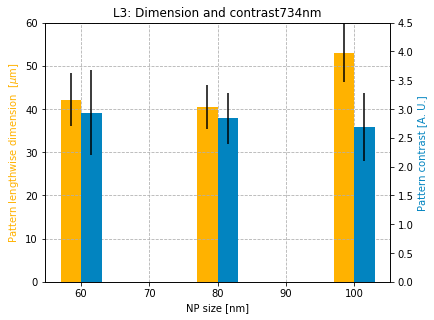

In [35]:
nps=[100, 80, 60]
data1=[d[0] for d in data]
data1_std=[d[0] for d in data_std]
data2=[d[4] for d in data]
data2_std=[d[4] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

w=3

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Dimension and contrast'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Pattern lengthwise dimension  [$\mu$m]',color=yellow)
axes.set_ylim([0, 60])

axesI = axes.twinx()
axesI.set_ylabel('Pattern contrast [A. U.]', color=blue)
axesI.set_ylim([0, 4.5])


axes.bar([s-w/2 for s in nps], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in nps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

# FPS change

In [10]:
fps=[10, 5, 2, 1]  


files=[folder+'norm_32_{}fps'.format(f) for f in fps]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('position in dip')
data=[]
data_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

position in dip
no	x	y	cx	cy	C	std	int	maxint	relBg
0f	32.5	8.5	2.87	3.53	2.34	0.00118	0.05709	0.00639	0.00094
n= 10	4.4	1.6	0.51	0.67	0.42	0.00002	0.01489	0.00090	0.00001
--------------------------------------------------------------------------------
5f	31.9	9.7	3.84	4.27	2.95	0.00093	0.06738	0.00569	0.00074
n= 10	3.1	2.6	0.56	1.13	0.75	0.00002	0.01801	0.00073	0.00002
--------------------------------------------------------------------------------
2f	34.0	13.2	4.53	4.56	3.05	0.00072	0.07840	0.00546	0.00058
n= 10	3.3	4.0	1.06	0.98	0.88	0.00002	0.01811	0.00081	0.00002
--------------------------------------------------------------------------------
1f	34.9	14.1	5.13	4.61	3.05	0.00064	0.08149	0.00540	0.00051
n= 10	3.8	1.8	0.89	0.63	0.44	0.00002	0.01574	0.00071	0.00002
--------------------------------------------------------------------------------


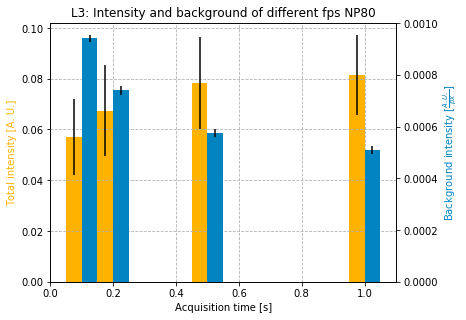

In [17]:
nps=[100, 80, 60]
fps=[1/f for f in fps]
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.05

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity and background of different fps NP80'
axes.set_title(name+': '+title)
axes.set_xlabel('Acquisition time [s]')
axes.set_ylabel('Total intensity [A. U.]', color=yellow)
# axes.set_ylim([0, 0.008])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
# axesI.set_ylim([0, 0.008])


axes.bar([s-w/2 for s in fps], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in fps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')